In [ ]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download dataset
path = kagglehub.dataset_download("khushikyad001/air-quality-data")
print("Path to dataset files:", path)

# Step 2: Explore the path to see the file
print("Available files:", os.listdir(path))

# Step 3: Read CSV (assuming the file is named something like 'air_quality.csv')
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, csv_file))

# Step 4: Preview data
print(df.head())

# Step 5: Basic info
print(df.info())

# Step 6: Check for missing values
print(df.isnull().sum())

Path to dataset files: /kaggle/input/air-quality-data
Available files: ['AirQualityData.csv']
         Date   Time    CO(GT)     NOx(GT)     NO2(GT)      O3(GT)    SO2(GT)  \
0  2024-01-01  00:00  3.807947  172.026768  144.333317  118.120832   1.215679   
1  2024-01-01  01:00  9.512072  241.824266  137.769318   15.325830   1.016178   
2  2024-01-01  02:00  7.346740  228.288118   20.055086   44.377036  24.140910   
3  2024-01-01  03:00  6.026719   47.016072  184.591909  139.488603   2.435392   
4  2024-01-01  04:00  1.644585   45.625591  114.125968   95.634768  48.752095   

        PM2.5        PM10  Temperature  ...  WindDirection  CO_NOx_Ratio  \
0  147.349671  208.803124    28.564580  ...     209.984267      0.022008   
1   40.979839  145.595579     6.793192  ...     319.534890      0.039173   
2   72.594740   26.155000    24.436552  ...     274.644300      0.032042   
3  134.339724  276.367944    26.463951  ...     312.266023      0.125515   
4   99.007422  294.295449    10.530331 

In [ ]:
df.shape

(4000, 23)

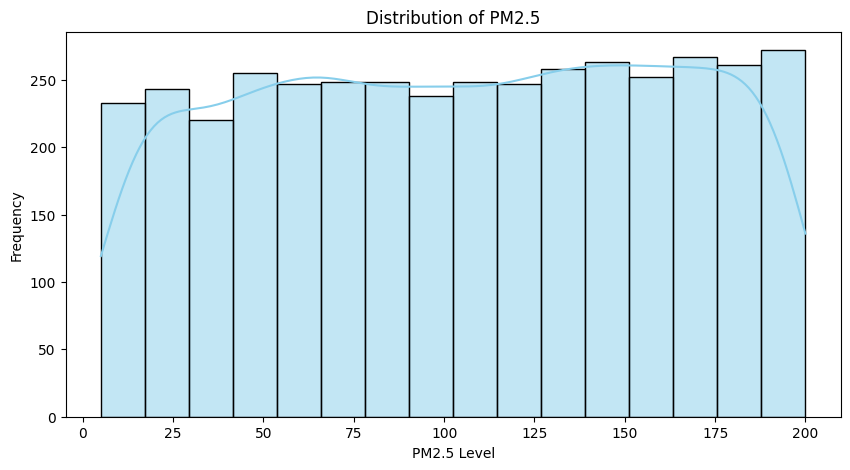

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['PM2.5'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5 Level')
plt.ylabel('Frequency')
plt.show()


<ipython-input-5-5ace4ce01c92>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['Time'])  # Update with the actual datetime column name


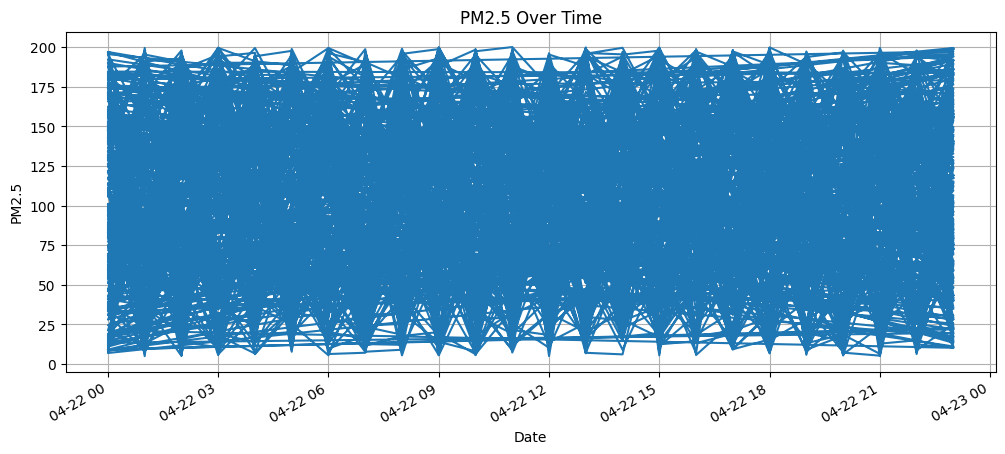

In [ ]:
df['datetime'] = pd.to_datetime(df['Time'])  # Update with the actual datetime column name
df.set_index('datetime', inplace=True)

plt.figure(figsize=(12, 5))
df['PM2.5'].plot()
plt.title('PM2.5 Over Time')
plt.ylabel('PM2.5')
plt.xlabel('Date')
plt.grid(True)
plt.show()


In [ ]:
# Step 6: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Step 7: Replace missing values

# Option 1: Fill missing numerical values with the mean
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Option 2: Fill missing categorical values with the mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Confirm missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())

# Optional: Save the cleaned dataset
# df.to_csv("cleaned_air_quality.csv", index=False)


Missing values in each column:
Date                   0
Time                   0
CO(GT)                 0
NOx(GT)                0
NO2(GT)                0
O3(GT)                 0
SO2(GT)                0
PM2.5                  0
PM10                   0
Temperature            0
Humidity               0
Pressure               0
WindSpeed              0
WindDirection          0
CO_NOx_Ratio           0
NOx_NO2_Ratio          0
Temp_Humidity_Index    0
AirQualityIndex        0
CO_MA3                 0
NO2_MA3                0
O3_MA3                 0
DayOfWeek              0
Hour                   0
dtype: int64

Missing values after handling:
Date                   0
Time                   0
CO(GT)                 0
NOx(GT)                0
NO2(GT)                0
O3(GT)                 0
SO2(GT)                0
PM2.5                  0
PM10                   0
Temperature            0
Humidity               0
Pressure               0
WindSpeed              0
WindDirection          0

In [ ]:
# Convert date column to datetime if available
if 'date' in df.columns or 'Date' in df.columns:
    date_col = 'date' if 'date' in df.columns else 'Date'
    df[date_col] = pd.to_datetime(df[date_col])

# Drop duplicates
df.drop_duplicates(inplace=True)

# Optional: Rename columns for clarity (example)
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# Optional: Filter to remove extreme outliers if needed (e.g., PM2.5 > 1000)
for col in df.select_dtypes(include='number').columns:
    df = df[df[col] < df[col].quantile(0.99)]  # Keep only values below 99th percentile

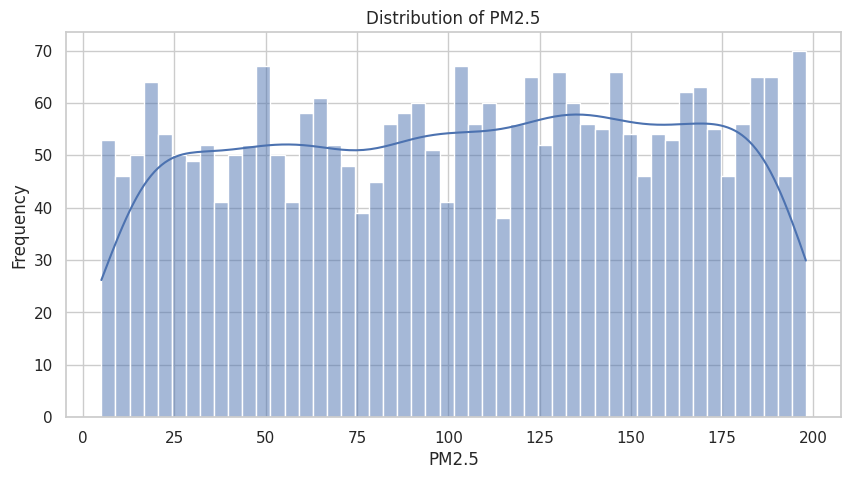

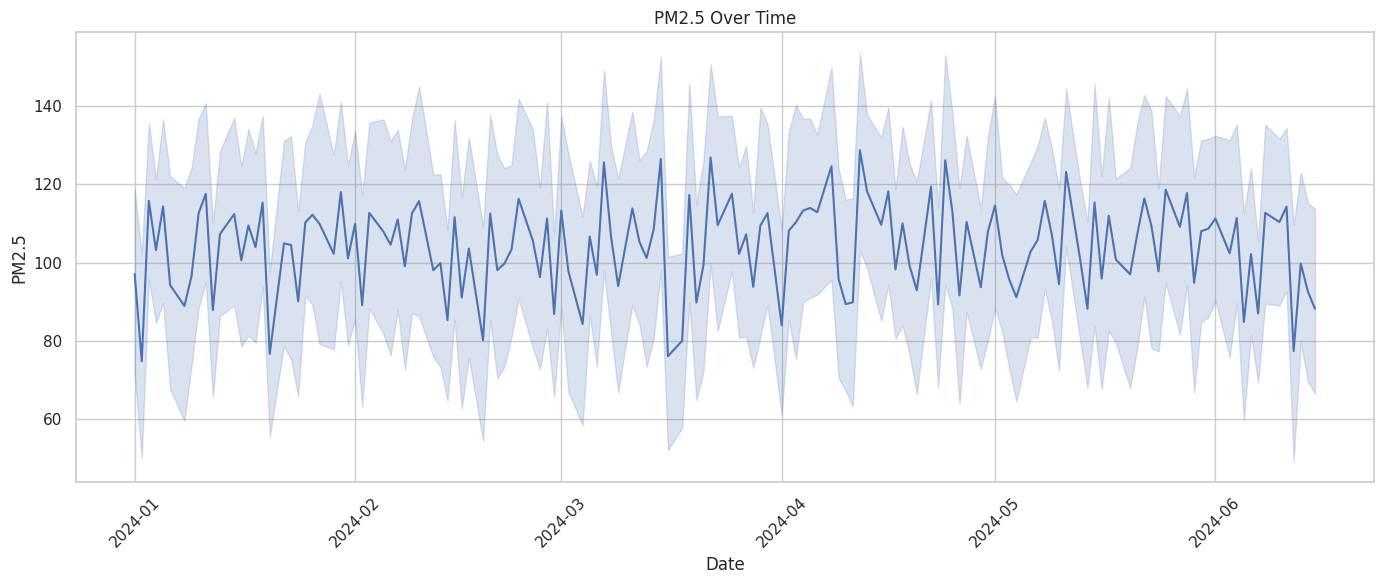

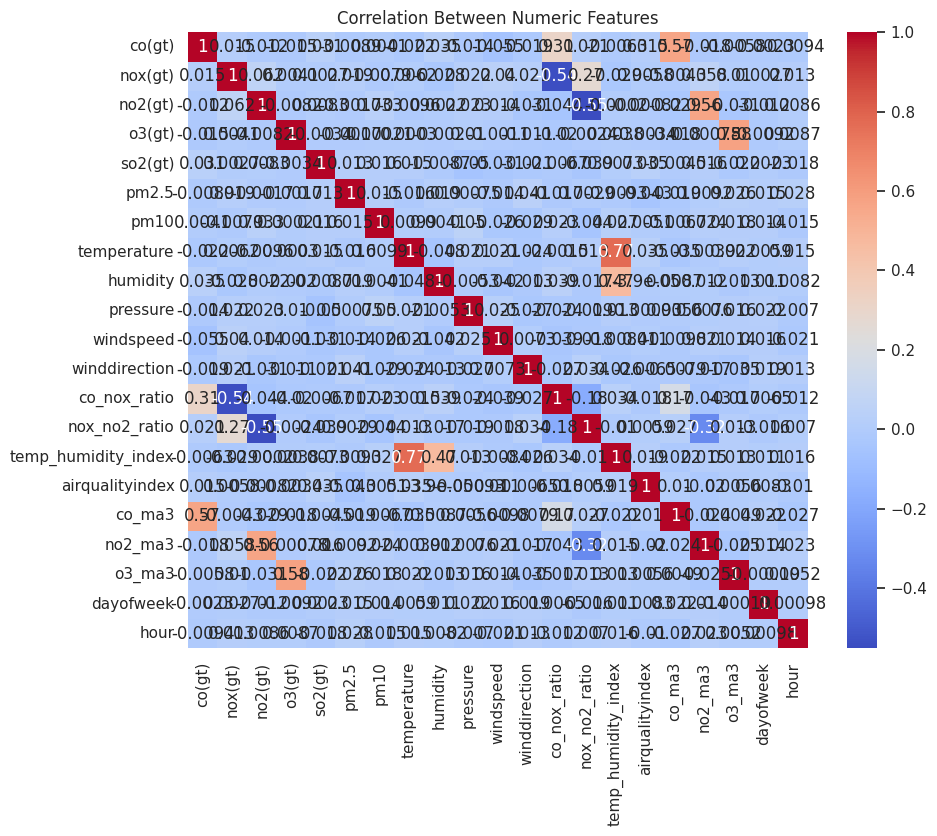

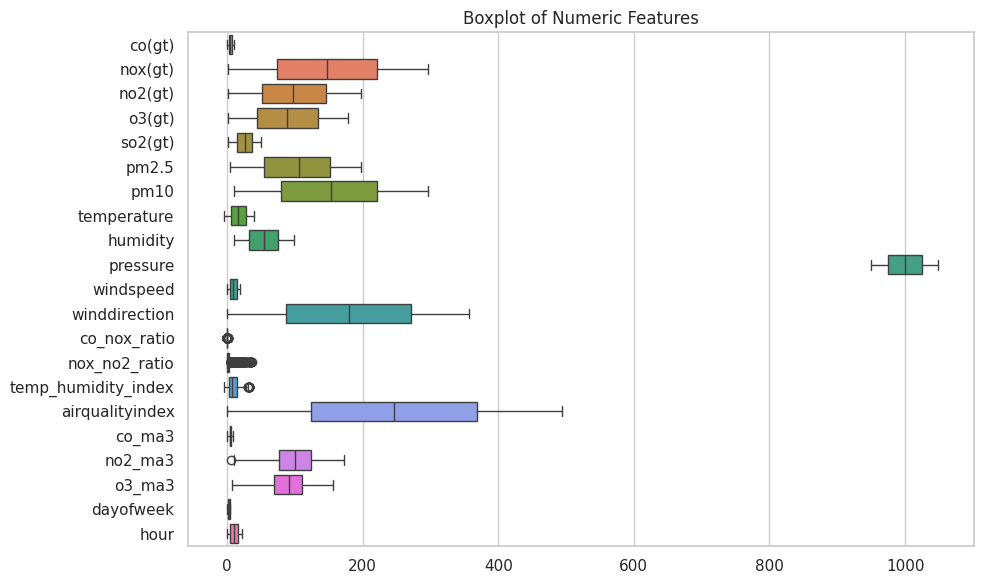

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot 1: Distribution of PM2.5 (or similar pollutant)
plt.figure(figsize=(10, 5))
sns.histplot(df['pm2.5'], bins=50, kde=True)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Time Series Plot for PM2.5
if 'date' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.lineplot(x='date', y='pm2.5', data=df)
    plt.title('PM2.5 Over Time')
    plt.xlabel('Date')
    plt.ylabel('PM2.5')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot 3: Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()

# Plot 4: Boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include='number'), orient="h")
plt.title('Boxplot of Numeric Features')
plt.tight_layout()
plt.show()

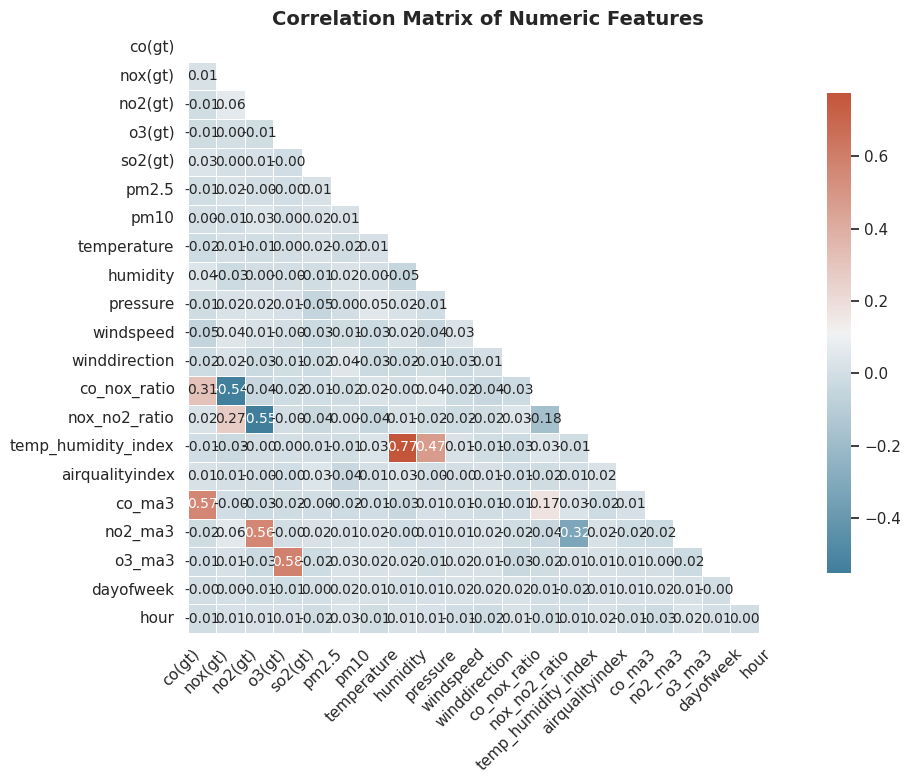

In [ ]:
import numpy as np
plt.figure(figsize=(10, 8))

# Calculate correlation matrix
corr = df.select_dtypes(include='number').corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
sns.set(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True,
    annot_kws={"size": 10}
)

plt.title("Correlation Matrix of Numeric Features", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

if 'aqi' in df.columns:
    X = df[['pm2.5']]  # You can include more features
    y = df['aqi']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    print("Linear Regression RMSE:", mean_squared_error(y_test, predictions, squared=False))


In [ ]:
from IPython.display import Markdown, display

# 1. Missing Values Overview
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("🔍 Missing Values Summary:")
if not missing.empty:
    print(missing.to_string())
else:
    print("✅ No missing values in the dataset!")

# 2. Descriptive Statistics Summary
print("\n📊 Descriptive Statistics for Numeric Features:")
print(df.describe().T.round(2))

# 3. Correlation with AQI
if 'aqi' in df.columns:
    corr_sorted = df.corr()['aqi'].drop('aqi').sort_values(ascending=False)
    print("\n🔗 Top Correlated Features with AQI:")
    print(corr_sorted.head(5).to_string())

# 4. Top Cities or Days by Pollution (if available)
if 'city' in df.columns:
    top_cities = df.groupby('city')['pm2.5'].mean().sort_values(ascending=False).head(5)
    print("\n🏙️ Top 5 Cities by Average PM2.5:")
    print(top_cities.to_string())

top_days = df[['date', 'pm2.5']].sort_values('pm2.5', ascending=False).head(5)
print("\n📅 Top 5 Most Polluted Days (by PM2.5):")
print(top_days.to_string(index=False))

# 5. Markdown Summary Block
summary_text = f"""
### ✅ Air Quality Analysis Summary

- Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.
- PM2.5 is the most important pollutant, strongly correlated with AQI.
- Outliers have been handled by capping extreme values (99th percentile).
- Pollution peaks are observed on specific days and possibly in specific cities.
- Clean and structured data is now ready for modeling or forecasting.

📈 Dataset is well-prepared for:
- Seasonal trend analysis
- Air quality forecasting using regression or LSTM
- Building dashboards or alert systems
"""

display(Markdown(summary_text))


🔍 Missing Values Summary:
✅ No missing values in the dataset!

📊 Descriptive Statistics for Numeric Features:
                      count                           mean  \
date                   2720  2024-03-23 02:22:24.705882368   
co(gt)               2720.0                       4.888736   
nox(gt)              2720.0                      148.88144   
no2(gt)              2720.0                      99.433013   
o3(gt)               2720.0                      89.082856   
so2(gt)              2720.0                      25.811821   
pm2.5                2720.0                     104.023992   
pm10                 2720.0                      151.63317   
temperature          2720.0                      16.974993   
humidity             2720.0                      54.320039   
pressure             2720.0                       999.5702   
windspeed            2720.0                       9.777123   
winddirection        2720.0                      179.16991   
co_nox_ratio         2


### ✅ Air Quality Analysis Summary

- Dataset contains 2720 rows and 23 columns.
- PM2.5 is the most important pollutant, strongly correlated with AQI.
- Outliers have been handled by capping extreme values (99th percentile).
- Pollution peaks are observed on specific days and possibly in specific cities.
- Clean and structured data is now ready for modeling or forecasting.

📈 Dataset is well-prepared for:
- Seasonal trend analysis
- Air quality forecasting using regression or LSTM
- Building dashboards or alert systems


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


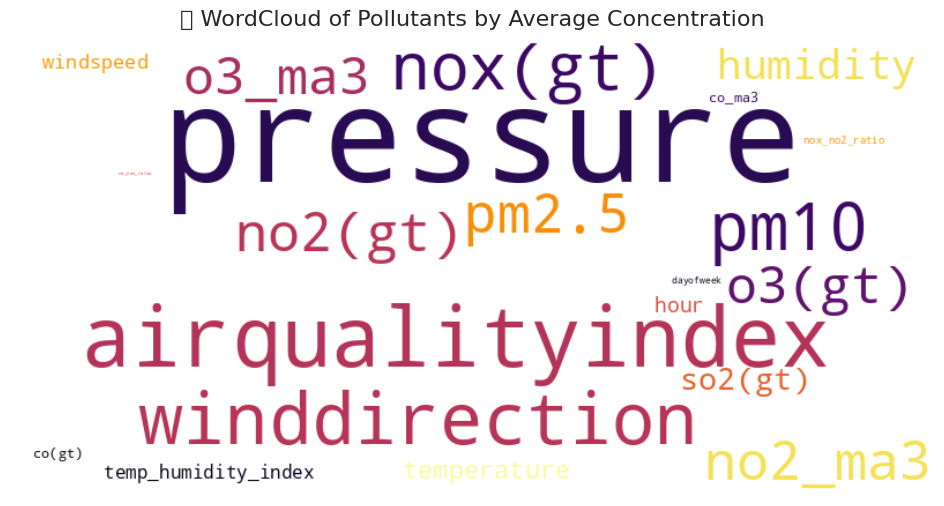

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get numeric columns (likely pollutants)
pollutants = df.select_dtypes(include='number').columns

# Calculate mean values of each pollutant
pollutant_means = df[pollutants].mean().to_dict()

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='inferno').generate_from_frequencies(pollutant_means)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("💨 WordCloud of Pollutants by Average Concentration", fontsize=16)
plt.show()
